Titel: Inleveropdracht 3: Vector Space Models & Principle Component Analysis <br>
Naam: Onno de Jong <br>
Studentnummer: 1809878

importeren benodigde libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

# Deel I: Vector Space Models

inladen van capitals bestand

In [2]:
capitals = pd.read_csv("capitals.txt", sep=" ", names=['city1', 'country1', 'city2', 'country2'])
capitals.sample(5)

,city1,country1,city2,country2
614,Algiers,Algeria,Copenhagen,Denmark
4577,Tunis,Tunisia,Apia,Samoa
488,Tokyo,Japan,Berlin,Germany
12,Athens,Greece,London,England
4556,Tripoli,Libya,Bratislava,Slovakia


inladen embeddings

In [3]:
relations = pd.read_pickle("word_embeddings_subset.p")
relations

{'country': array([-0.08007812,  0.13378906,  0.14355469,  0.09472656, -0.04736328,
        -0.02355957, -0.00854492, -0.18652344,  0.04589844, -0.08154297,
        -0.03442383, -0.11621094,  0.21777344, -0.10351562, -0.06689453,
         0.15332031, -0.19335938,  0.26367188, -0.13671875, -0.05566406,
         0.07470703, -0.00070953,  0.09375   , -0.14453125,  0.04296875,
        -0.01916504, -0.22558594, -0.12695312, -0.0168457 ,  0.05224609,
         0.0625    , -0.1484375 , -0.01965332,  0.17578125,  0.10644531,
        -0.04760742, -0.10253906, -0.28515625,  0.10351562,  0.20800781,
        -0.07617188, -0.04345703,  0.08642578,  0.08740234,  0.11767578,
         0.20996094, -0.07275391,  0.1640625 , -0.01135254,  0.0025177 ,
         0.05810547, -0.03222656,  0.06884766,  0.046875  ,  0.10107422,
         0.02148438, -0.16210938,  0.07128906, -0.16210938,  0.05981445,
         0.05102539, -0.05566406,  0.06787109, -0.03759766,  0.04345703,
        -0.03173828, -0.03417969, -0.011

checken of de dimensies van het embeddings object correct zijn ingeladen <br>
243 embeddings met 300 dimensies

In [4]:
len(relations)

243

In [5]:
relations['Athens'].size

300

de cosine functie berekend de similarity tussen 2 vectors van dezelfde dimensies <br>
wiskunde functie cosine:
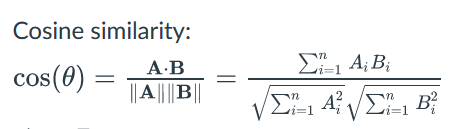

In [6]:
def cosine_dist(A : np.array, B : np.array) -> float:
    if (A.size != B.size):
        return
    
    return np.matmul(A, B) / (np.sqrt(np.sum(A ** 2)) * np.sqrt(np.sum(B ** 2)))

testen functie cosine,
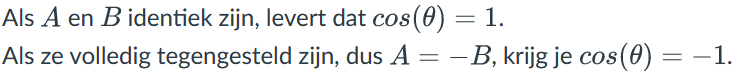

In [7]:
a = np.array([1, 2, 3, 4, 5, 6])
b = np.array([1, 2, 3, 4, 5, 6])

cosine_dist(a, b)

1.0

In [8]:
a = np.array([1, 2, 3, 4, 5, 6]) * -1
b = np.array([1, 2, 3, 4, 5, 6])

cosine_dist(a, b)

-1.0

In [9]:
def euclidean_dist(A : np.array, B : np.array) -> float:
    if (A.size != B.size):
        return
    
    return np.sqrt(np.sum([(A[i] - B[i]) ** 2 for i in range(A.size)]))

Testen van de functies cosine en euclidean, <br>
cosine_disct('King', 'Queen') => 0.6510957 <br>
euclidean_dist('King', 'Queen') => 2.4796925

In [10]:
cosine_dist(relations['king'], relations['queen'])

0.65109557

In [11]:
euclidean_dist(relations['king'], relations['queen'])

2.4796923748357105

In [12]:
def predict(city1 : str, country1 : str, city2 : str,  embeddings : dict) -> tuple:
    # de vector van de target
    target = embeddings[country1] - embeddings[city1] + embeddings[city2]
    
    # de laagste cosine is -1
    max_cos = -1
    
    # loopen over de embeddings om te kijken welke cosine het hoogste is
    for index, value in embeddings.items():
        # omdat we het hier over voorspellingen hebben kan city2 niet in country1 liggen 
        # en het kan uiteraard ook niet city1 of zichzelf zijn
        if index not in [city1, city2, country1]:
            
            # cosine uitrekenen en gelijk opslaan in variabele 1
            if (i:= cosine_dist(target, value)) > max_cos:
                max_cos = i
                target_ind = index
                
    # return de targen en zijn cosine
    return (target_ind, max_cos)

Testen van de functie door 'Athens', 'Greece', 'Cairo' als input te geven. De output zou dan ('Egypt', 0.7626822) moeten zijn.

In [13]:
predict('Athens', 'Greece', 'Cairo', relations)

('Egypt', 0.7626821)

In [14]:
def accuracy(cities : pd.DataFrame, embeddings : dict) -> float:
    # totaal aantal goede antwoorden
    total = 0
    
    # interrows krijge je de index, values uit de columns, de index hebben we niet nodig (arbitraire index)
    for _, row in cities.iterrows():
        
        # kijken of country2 gelijk is aan de prediction
        if row[3] == predict(*row[0:3], embeddings)[0]:
            total += 1
            
    return total / len(cities)

testen van de accuracy van het model, we verwachten een accuracy van rond de 92%

In [15]:
accuracy(capitals, relations)

0.9192245557350566

# Deel II: Principle Component Analysis

We schrijven in dezelfde notebook een functie om PCA op een verzameling word vectors, met deze in- en output:
Input:
X: numpy matrix van dimensie (m,n), elke row is een word vector
n_components: gewenste aantal dimensies
Output:
X_reduced: De data getransformeerd naar 2 dimensies (columns)

De functie moet de volgende transformaties op de data uitvoeren:

    Centreer de data op het gemiddelde (trek het gemiddelde van elk datapunt af) d.m.v. numpy.mean() 

Links to an external site.
Bereken de covariance matrix van de gecentreerde data d.m.v. numpy.cov()
Links to an external site.
Bereken de Eigenvectors en Eigenvalues van de covariance matrix d.m.v. numpy.linalg.eigh()
Links to an external site.
Sorteer de Eigenvectors in volgorde van afnemende Eigenvalue (zoek zelf de juiste numpy functie)
Neem de eerste n Eigenvectors uit de gesorteerde array
Vermenigvuldig
Links to an external site. die Eigenvectors met de originele gecentreerde data uit stap 1 (transpose Links to an external site. je matrices waar nodig).

In [29]:
def compute_PCA(X : np.ndarray, n_components : int) -> np.ndarray:
    # centreren op gemiddelde door gemiddelde van elke waarde af te trekken
    X_mean = X - np.mean(X, axis=0)
    
    # covariance berekenen d.m.v. numpy.cov() en tranposes want we willen de y reducen niet de x,
    # rowvar transposed de matrix zodat we de juiste vorm krijgen
    cov = np.cov(X_mean, rowvar=False)
    
    # Eigenvectors / Eigenvalues berekenen d.m.v. numpy.linalg.eigh() en de variance die we net hebben uitgerekend
    EigenValues, EigenVectors = np.linalg.eigh(cov)
    
    # sorteren eigenvalues en daar de indices van nemen met de np.ndarray.argsort() 
    # en ook gelijk omdraaien door middel van een step waarde van -1
    indices = EigenValues.argsort()[::-1]   
    
    # we nemen de indices van de gesoorterde eigenvalues en passen die toe op de eigenvectors
    # willen we de plaatsen van de rows(y-axis) aanpassen niet die van de columns (x-axis)
    EigenVectors = EigenVectors[:,indices]
    
    # nemen n values van eigenvectors
    EigenVectors = EigenVectors[:, 0:n_components]
    
#     print(EigenVectors.shape)
#     print(X.shape)
    
    return np.matmul(X_mean, EigenVectors)
    return np.matmul(EigenVectors.transpose(), X_mean.transpose()).transpose()
    

In [30]:
np.random.seed(1)
X = np.random.rand(3, 10)
X_reduced = compute_PCA(X, n_components=2)
print("De originele matrix is " + str(X.shape) + ", en na PCA:")
print(X_reduced)

De originele matrix is (3, 10), en na PCA:
[[ 0.43437323 -0.49820384]
 [ 0.42077249  0.50351448]
 [-0.85514571 -0.00531064]]


ik krijg wel de juiste waardes maar niet de juiste polariteit, ik weet niet zo goed hoe dit komt

In [18]:
def get_embeddings(embeddings : dict, words : list) -> np.ndarray:
    return [embeddings[word] for word in words]

In [19]:
# berekenen van de waardes met de compute_PCA en get_embeddings functies
y = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']
x = compute_PCA(get_embeddings(relations, y), 2)

x

array([[ 2.07403081,  0.22656516],
       [ 1.84412359,  0.0385692 ],
       [-1.01973045,  1.26888135],
       [-1.17578721,  1.76076428],
       [-0.6017798 , -1.09324112],
       [-0.85581146, -1.29616204],
       [-0.99052561, -1.61222191],
       [-0.31802038, -0.41533401],
       [-0.21069346, -0.57592552],
       [ 2.31358422,  0.29783528],
       [-1.05939027,  1.40026933]])

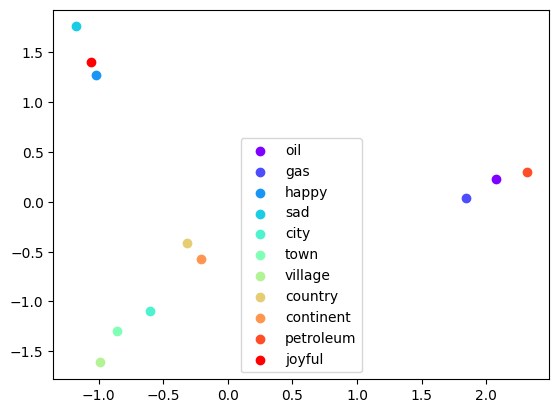

In [20]:
import matplotlib.cm as cm

xs = np.arange(10)
ys = [i+xs+(i*xs)**2 for i in range(len(x))]

colors = cm.rainbow(np.linspace(0, 1, len(ys)))

for index, values in enumerate(x):
    plt.scatter(*values, color=colors[index], label=y[index])
plt.legend()

worden die een beetje bij elkaar horen I.e. city, town en village liggen bij elkaar. Ze hebben een bepaalde relatie en die relatie is hier duidelijk te zien. Ook sad, happy, en joyful hebben een "sterke" relatie